In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import yfinance as yf

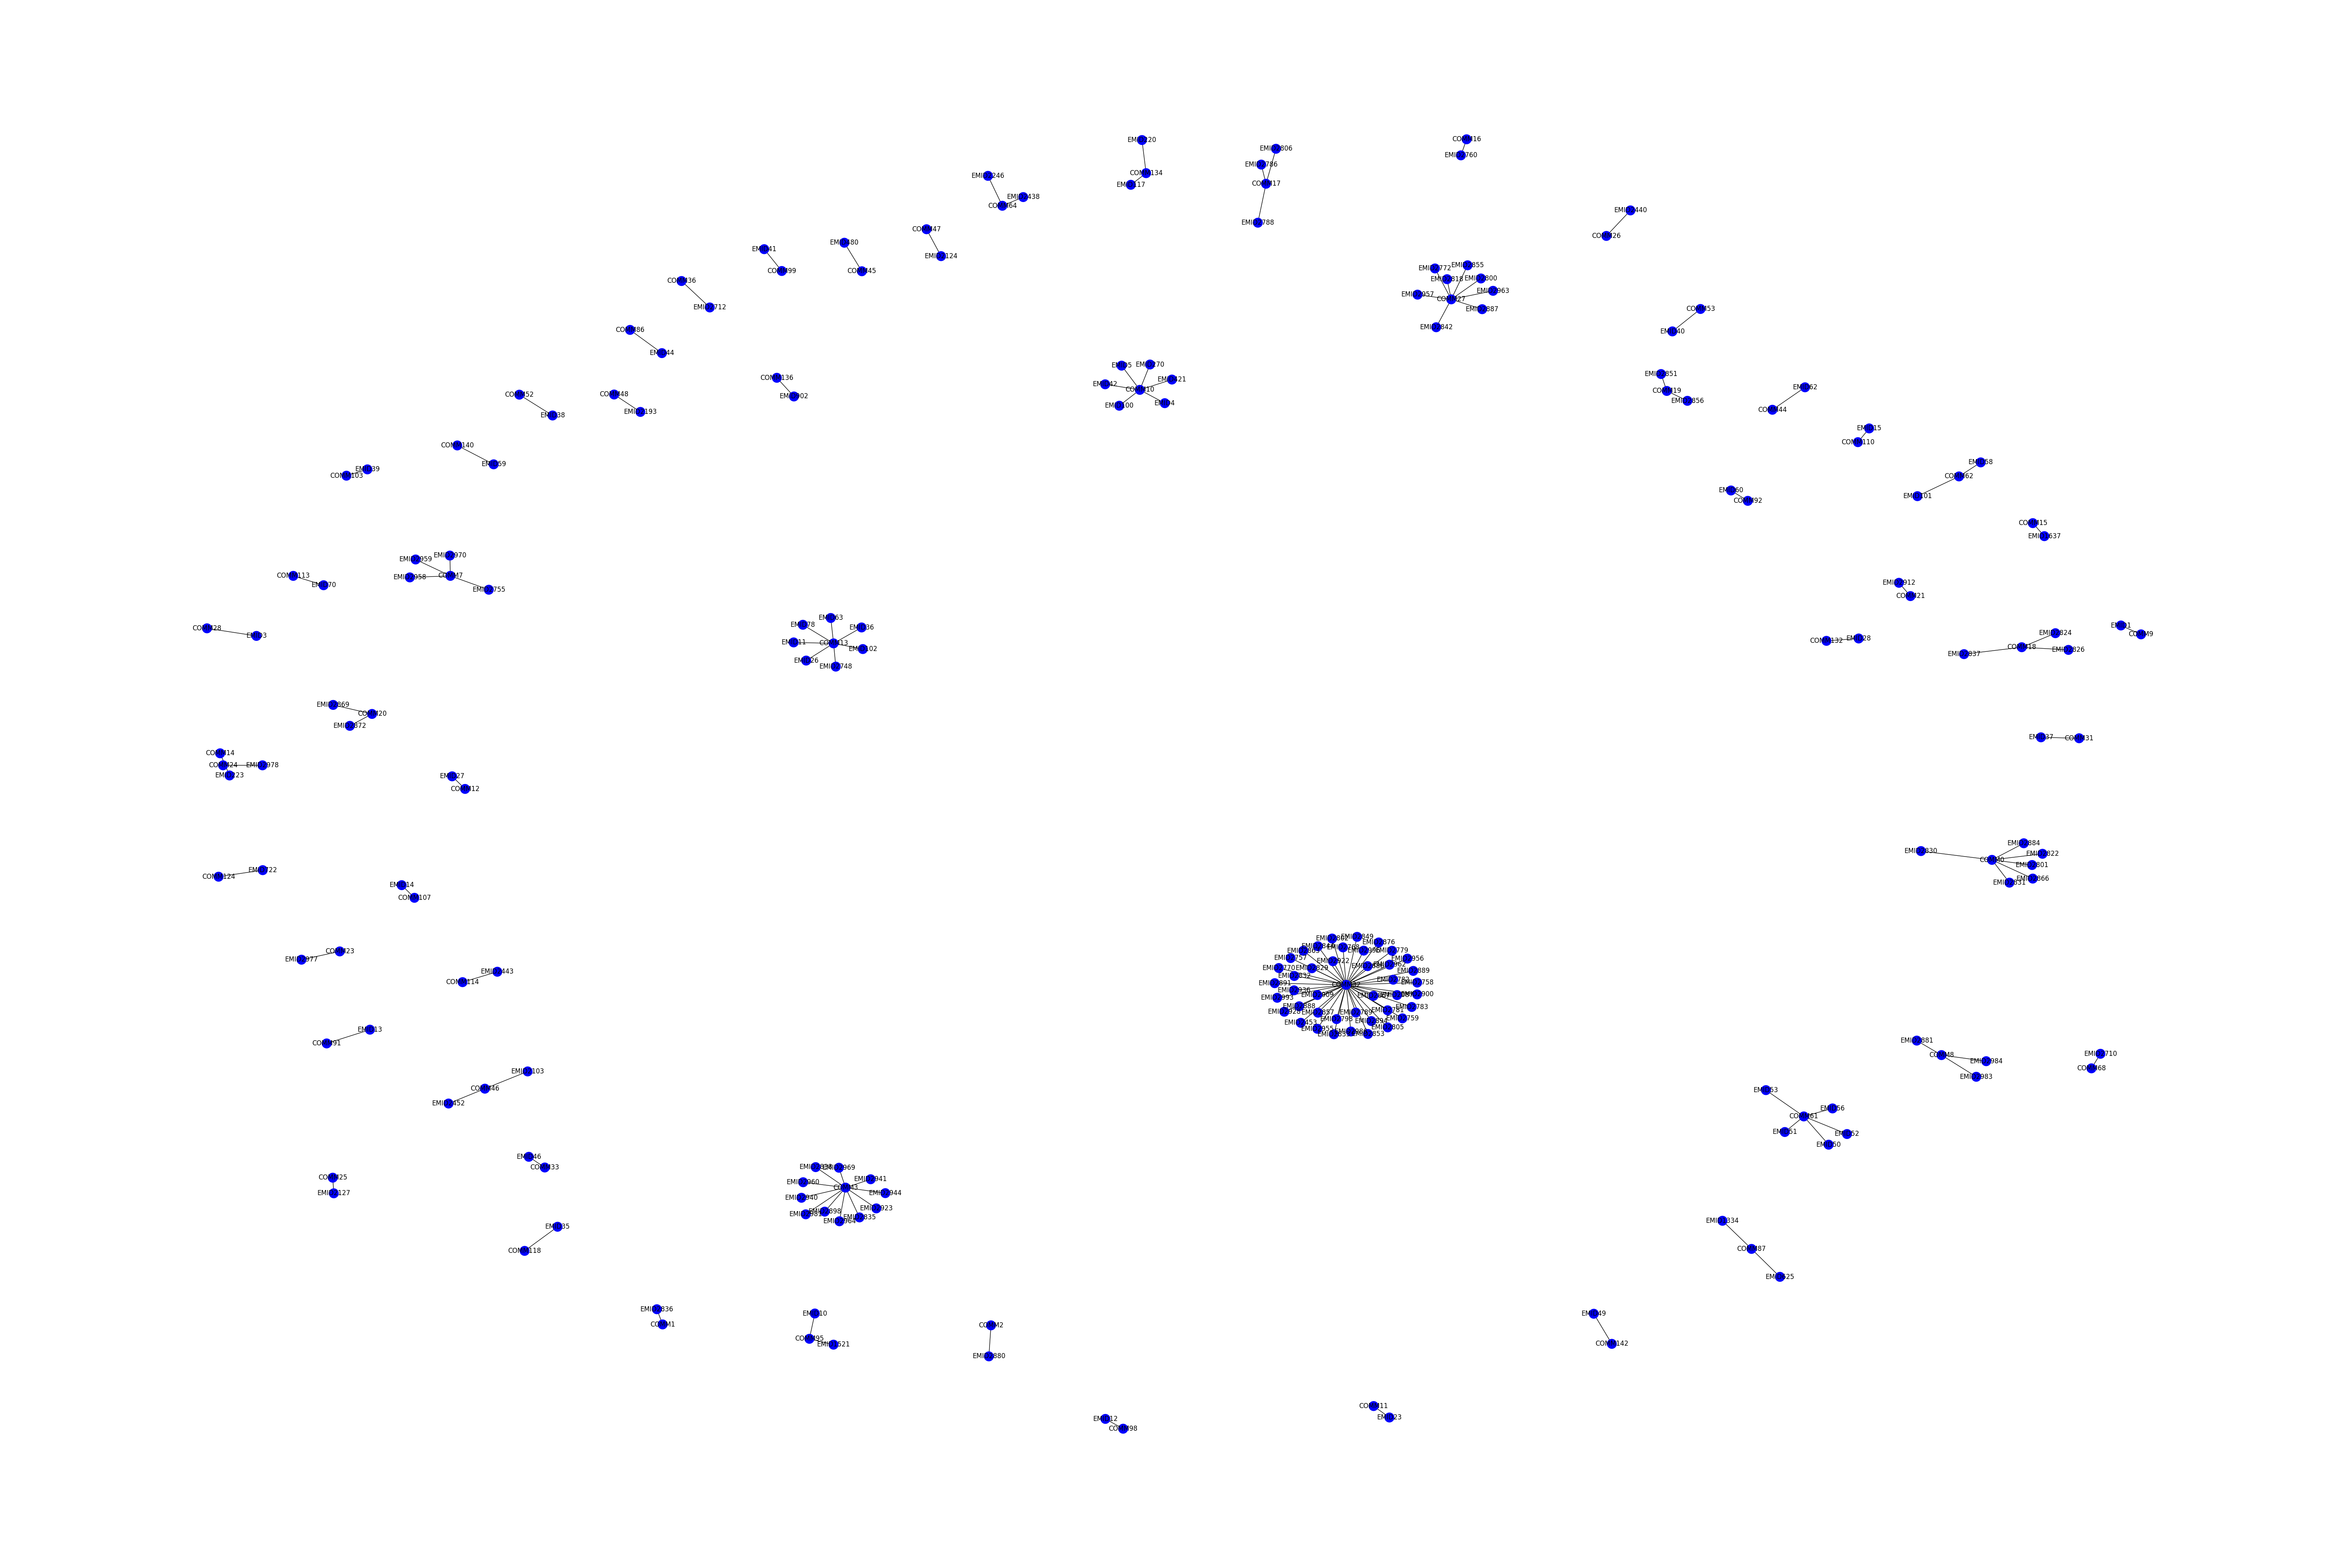

In [2]:
db1 = pd.read_excel("tbl_email_1.xlsx").head(10)
db2 = pd.read_excel("tbl_communication_stream_0.xlsx")
db3 = pd.read_excel("tbl_sentence_0.xlsx")
all_db = pd.concat([db1,db2], axis=1)
plt.figure(figsize=(60,40))
NG = nx.from_pandas_edgelist(db2, 'comm_stream_id', 'email_id')
color = []
for node in NG:
    if node in db2['comm_stream_id']:
        color.append("red")
    else:
        color.append("blue")
nx.draw(NG, with_labels = True, node_color=color)

###################################################################################
#A communication stream in this case represents a set of emails that is between two
#email addresses and is represented by a red dot
#while the e-mails are represented by a blue dot
###################################################################################

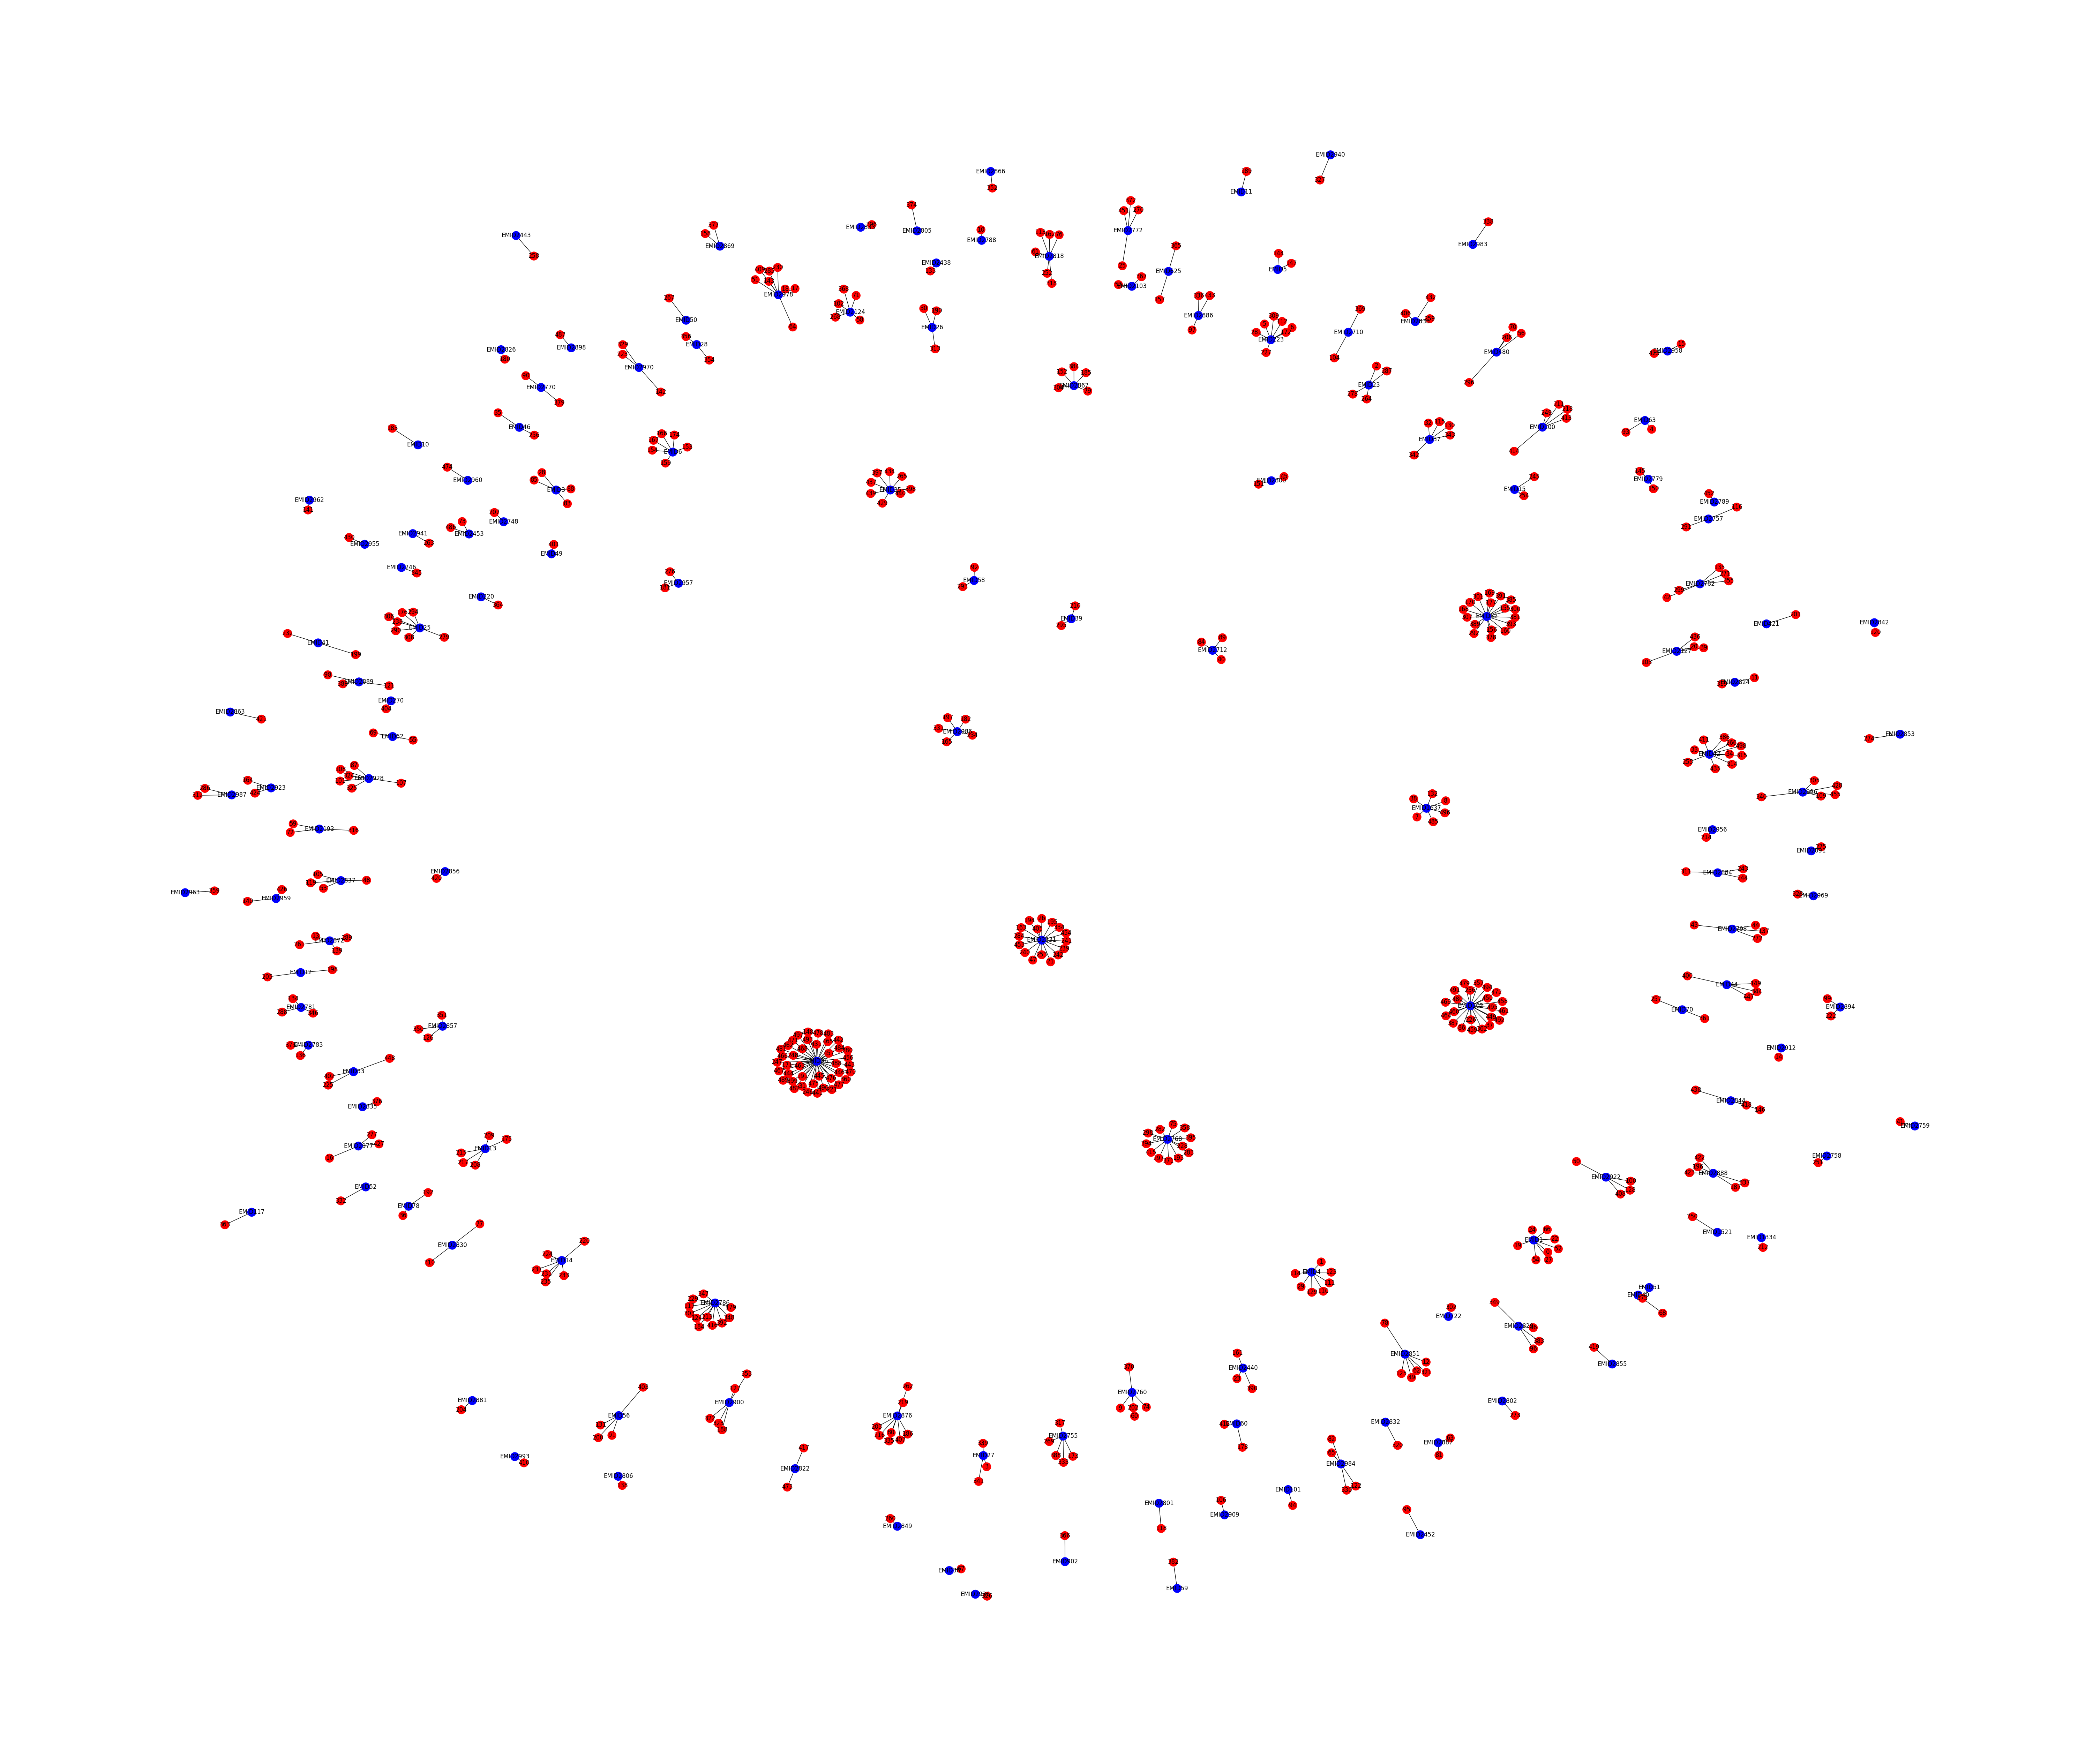

In [3]:
plt.figure(figsize=(60,50))
NG1 = nx.from_pandas_edgelist(db3, 'ID', 'email_id')
color = []
for node in NG1:
    if node in db3['email_id']:
        color.append("red")
    else:
        color.append("blue")
nx.draw(NG1, with_labels = True, node_color=color)

##########################################################
#id of the e-mails that are marked with a blue dot and the 
#sentences that are in them with a blue dot
##########################################################

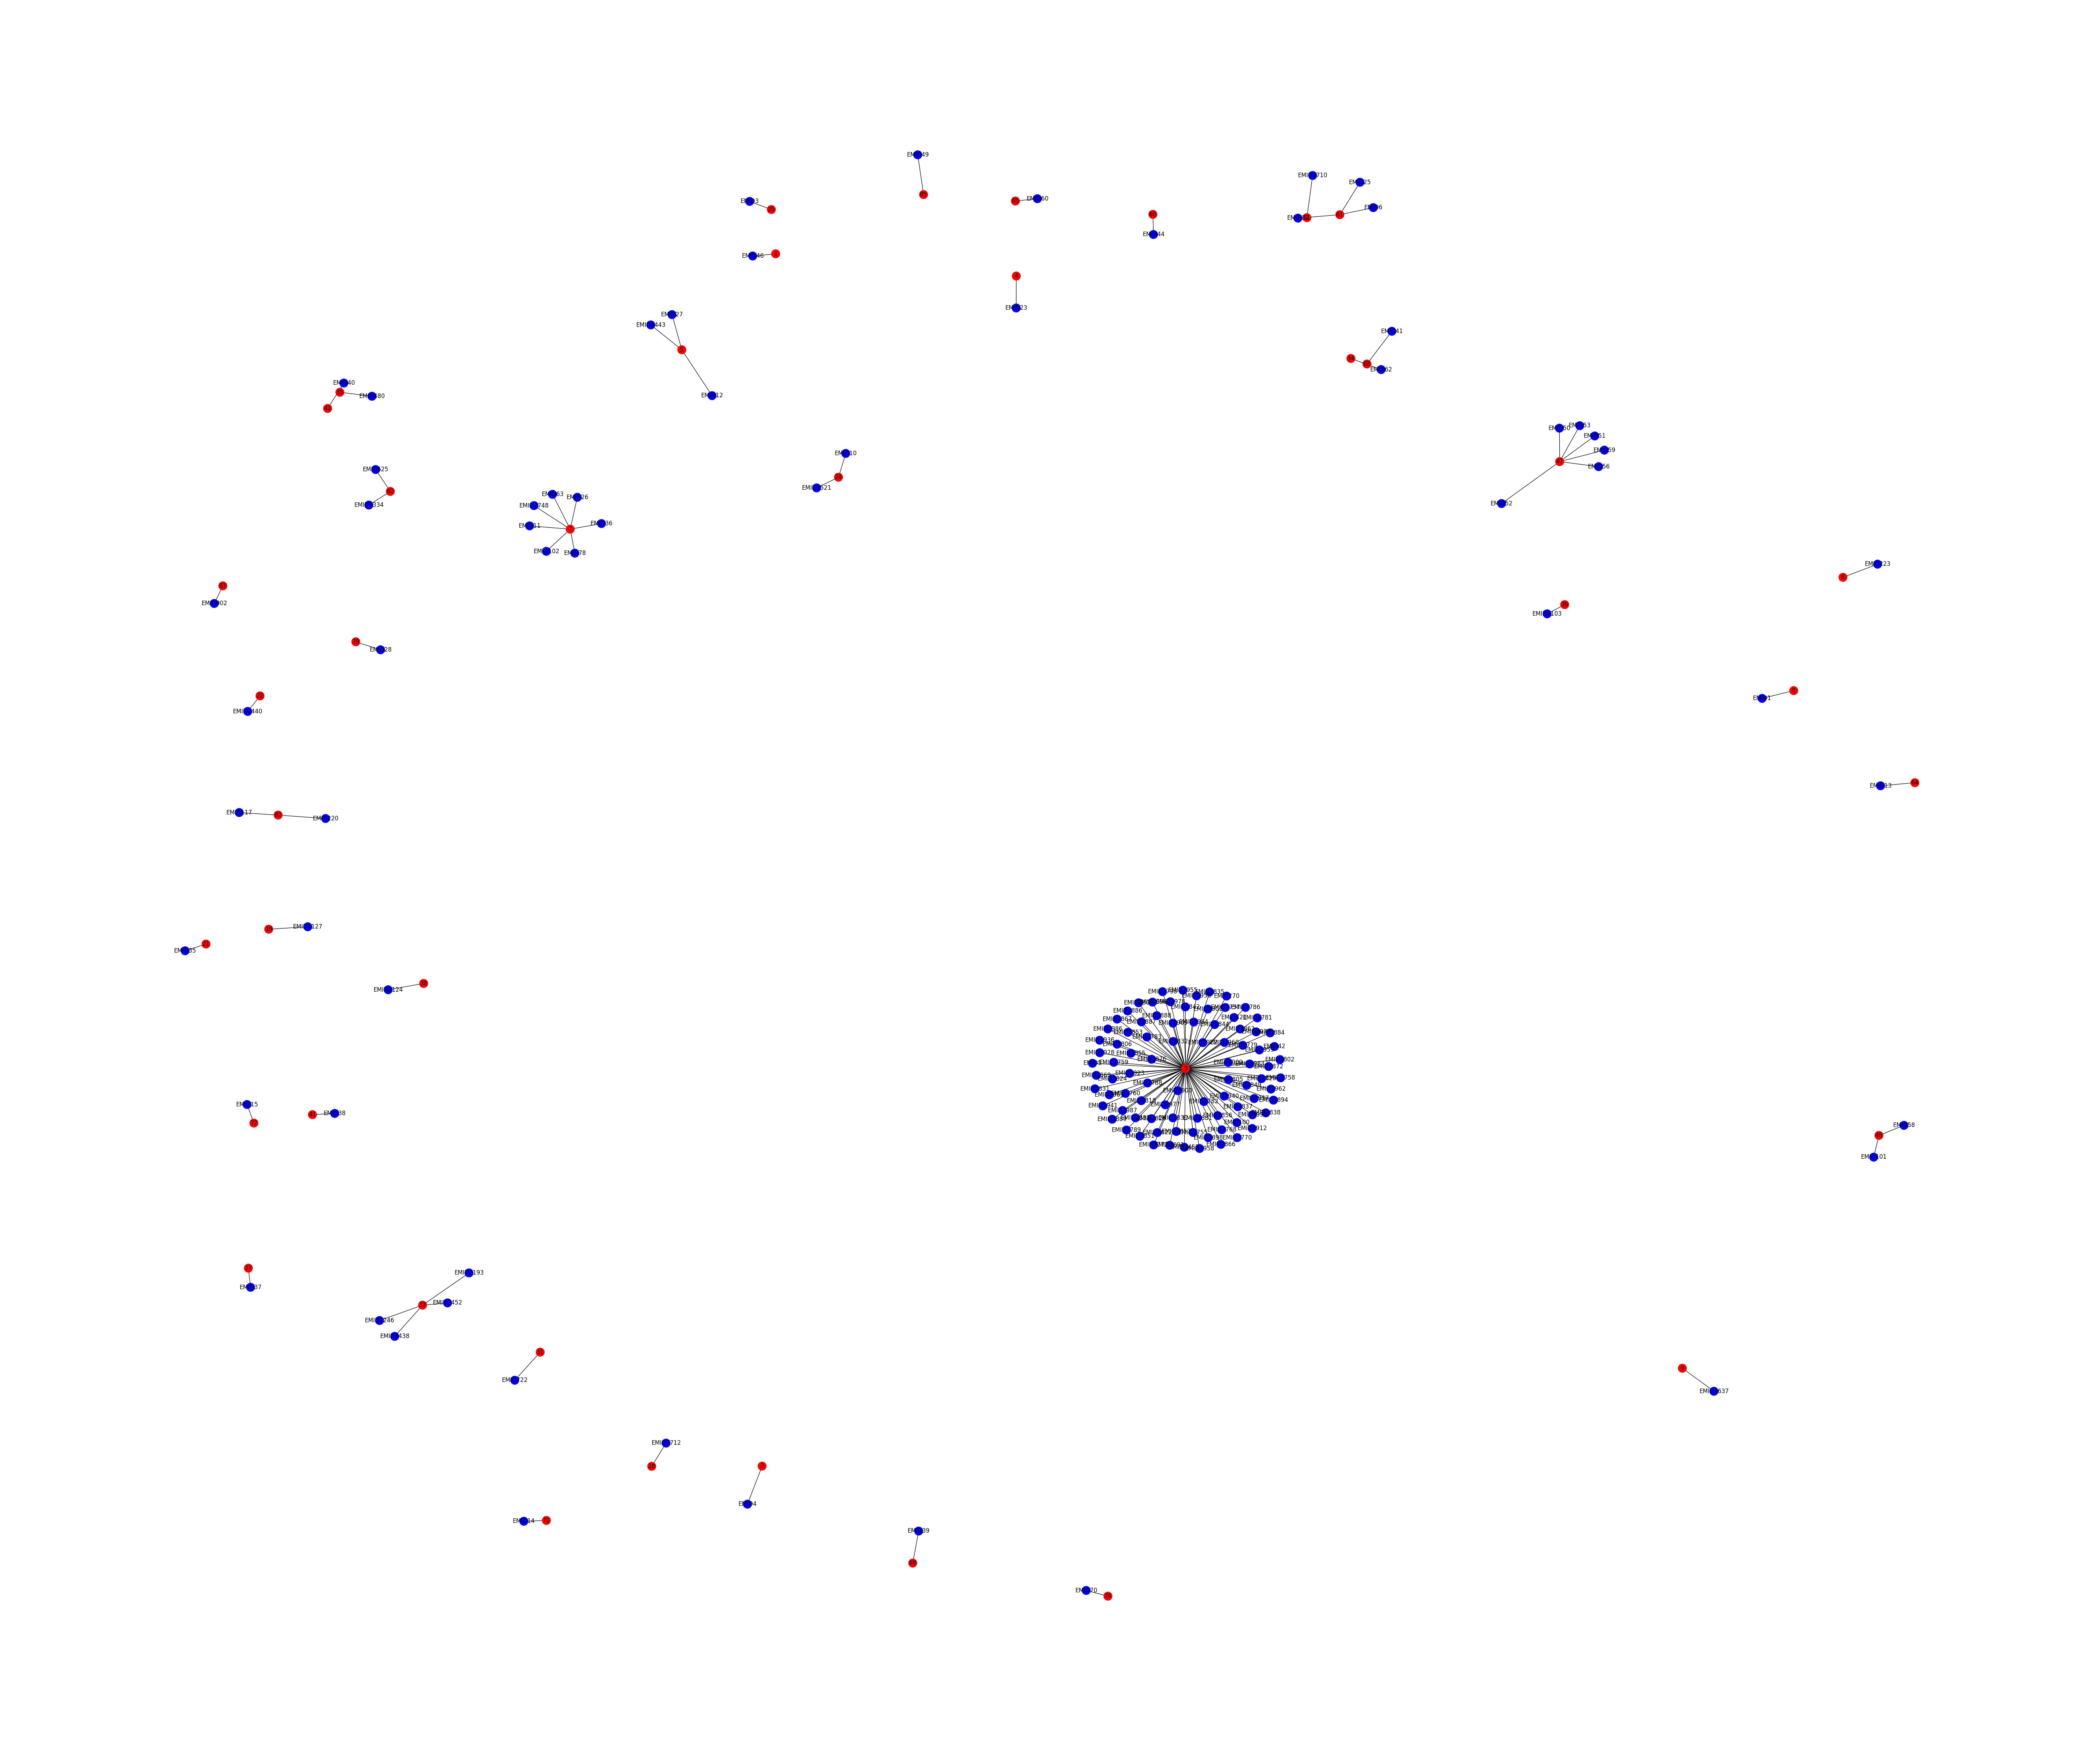

In [23]:
plt.figure(figsize=(60,50))
NG2 = nx.from_pandas_edgelist(db3, 'email_id', 'from(email index)')
color = []
for node in NG2:
    if node in db3['email_id']:
        color.append("red")
    else:
        color.append("blue")
nx.draw(NG2, with_labels = True, node_color=color)
################################################
#Emails and their sender
################################################

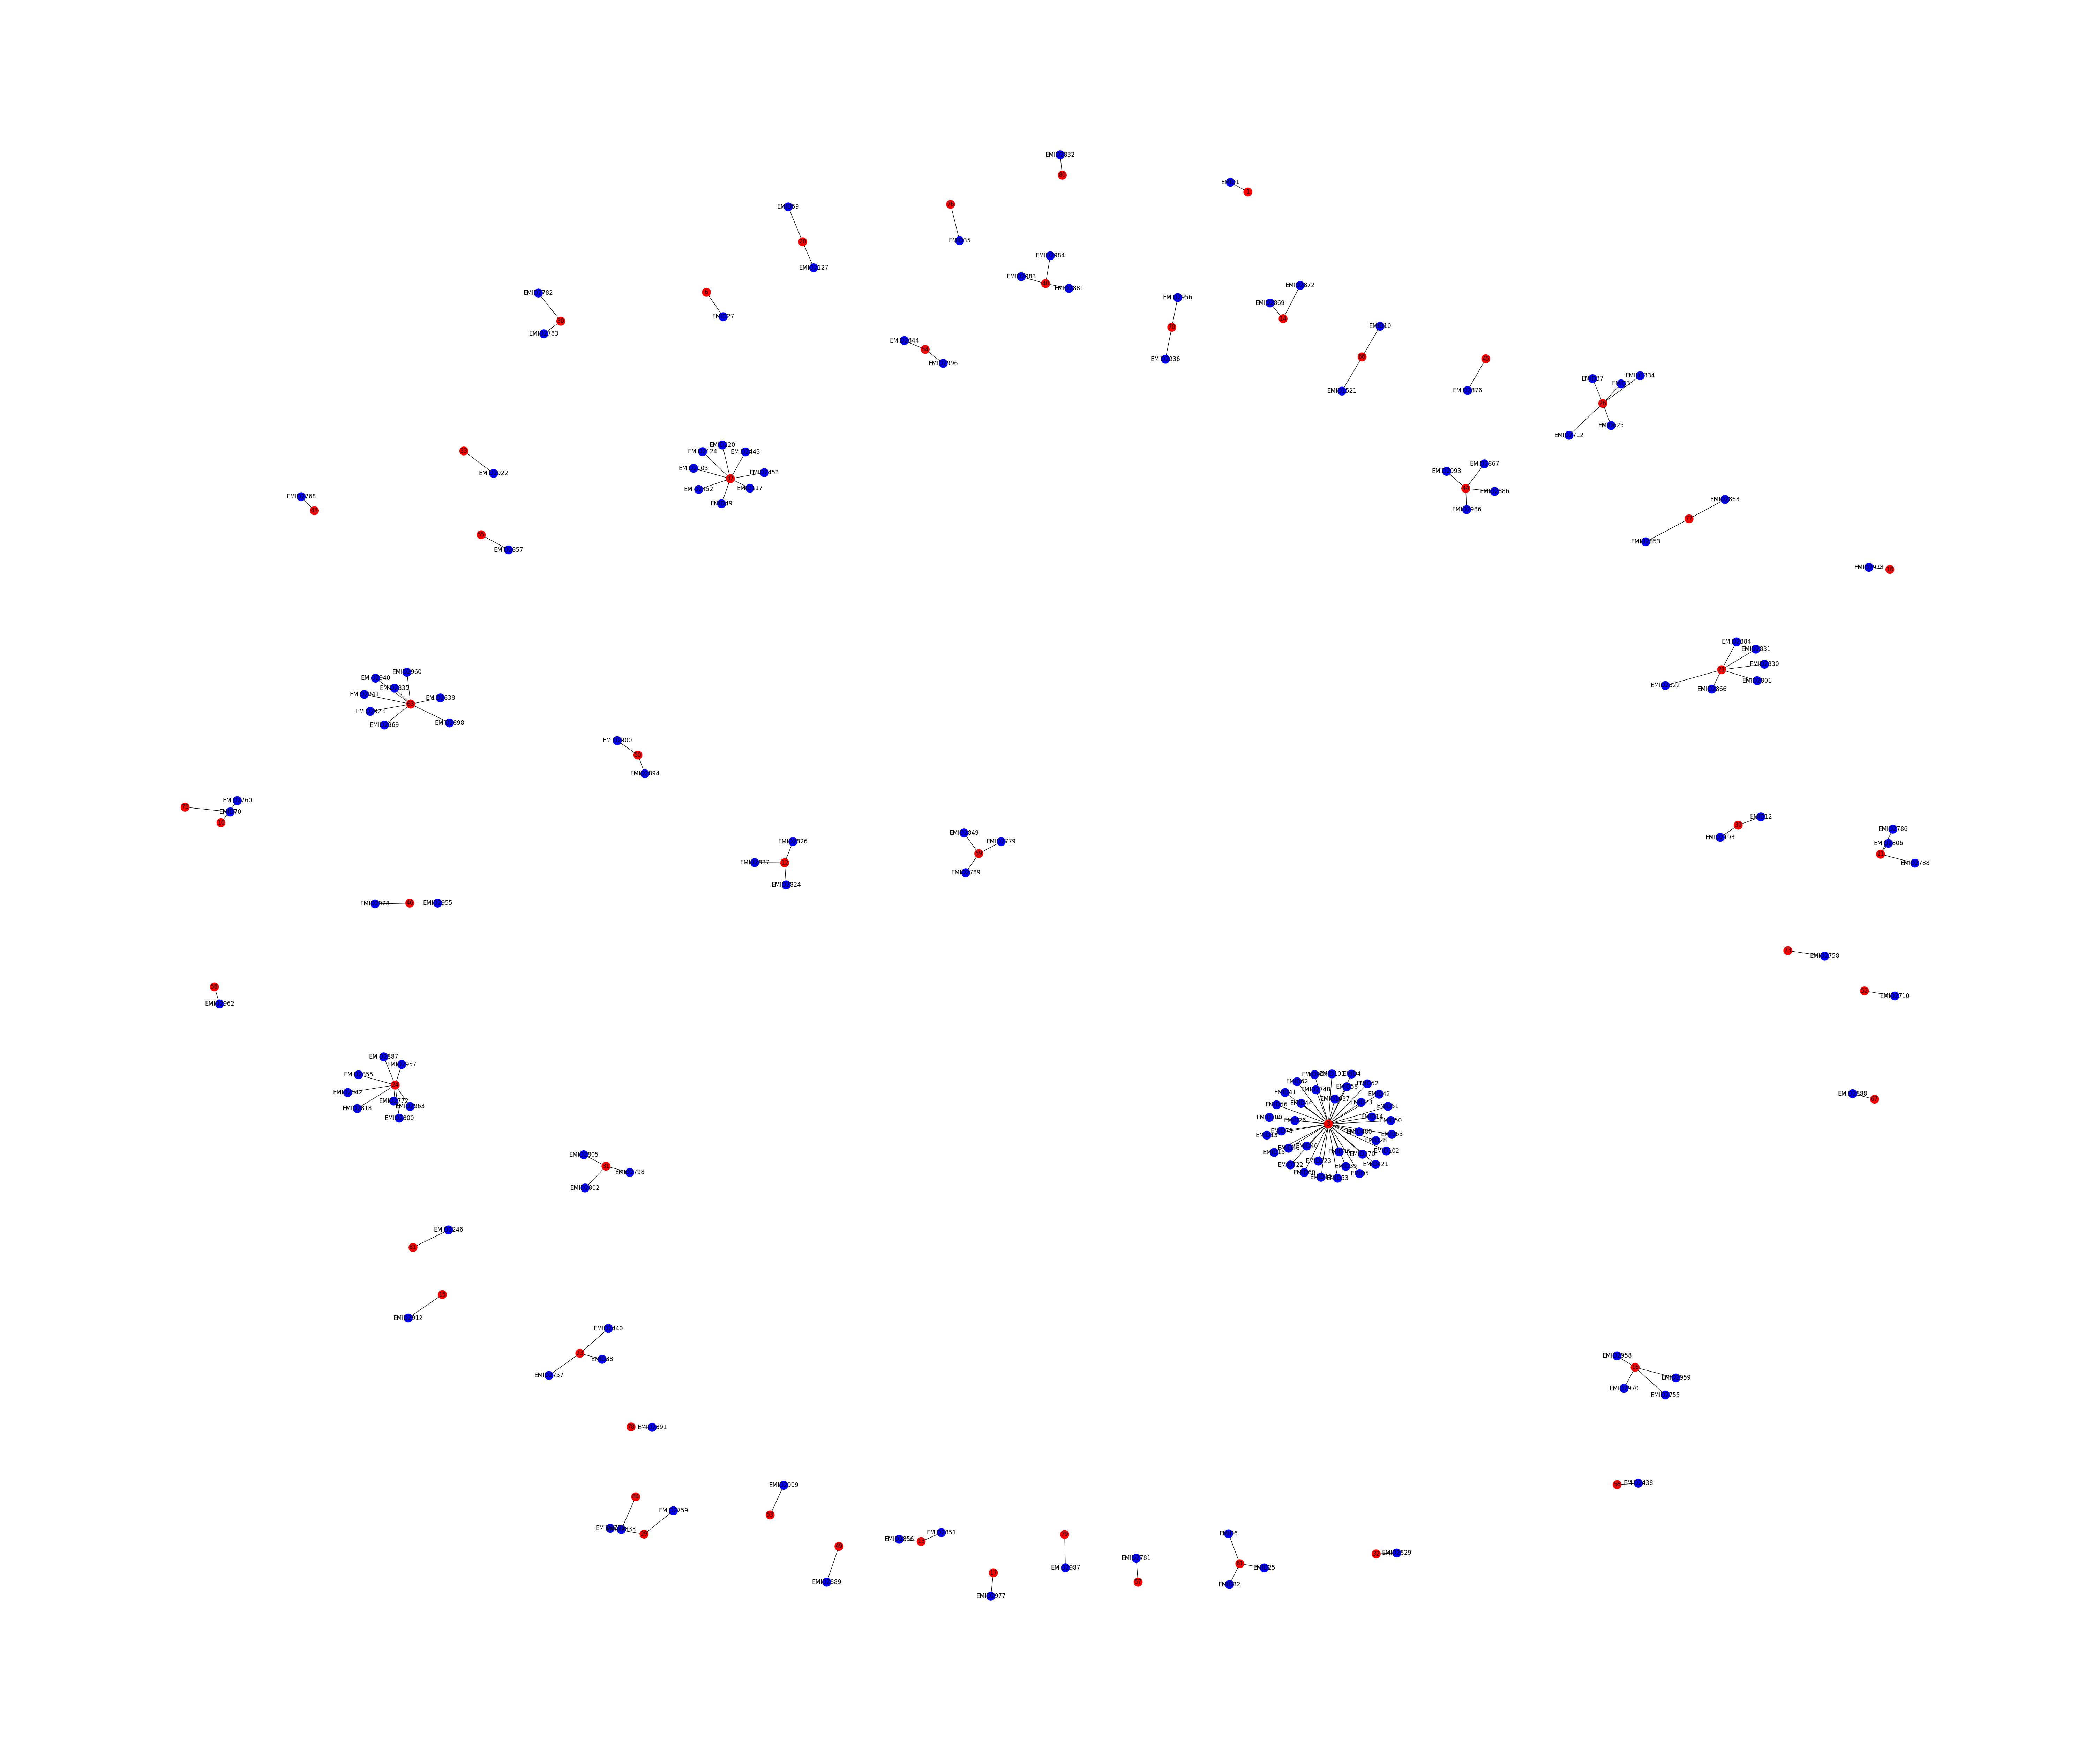

In [4]:
plt.figure(figsize=(60,50))
NG3 = nx.from_pandas_edgelist(db3, 'email_id', 'to(email index)')
color = []
for node in NG3:
    if node in db3['email_id']:
        color.append("red")
    else:
        color.append("blue")
nx.draw(NG3, with_labels = True, node_color=color)
################################################
#Emails and their recipient
################################################

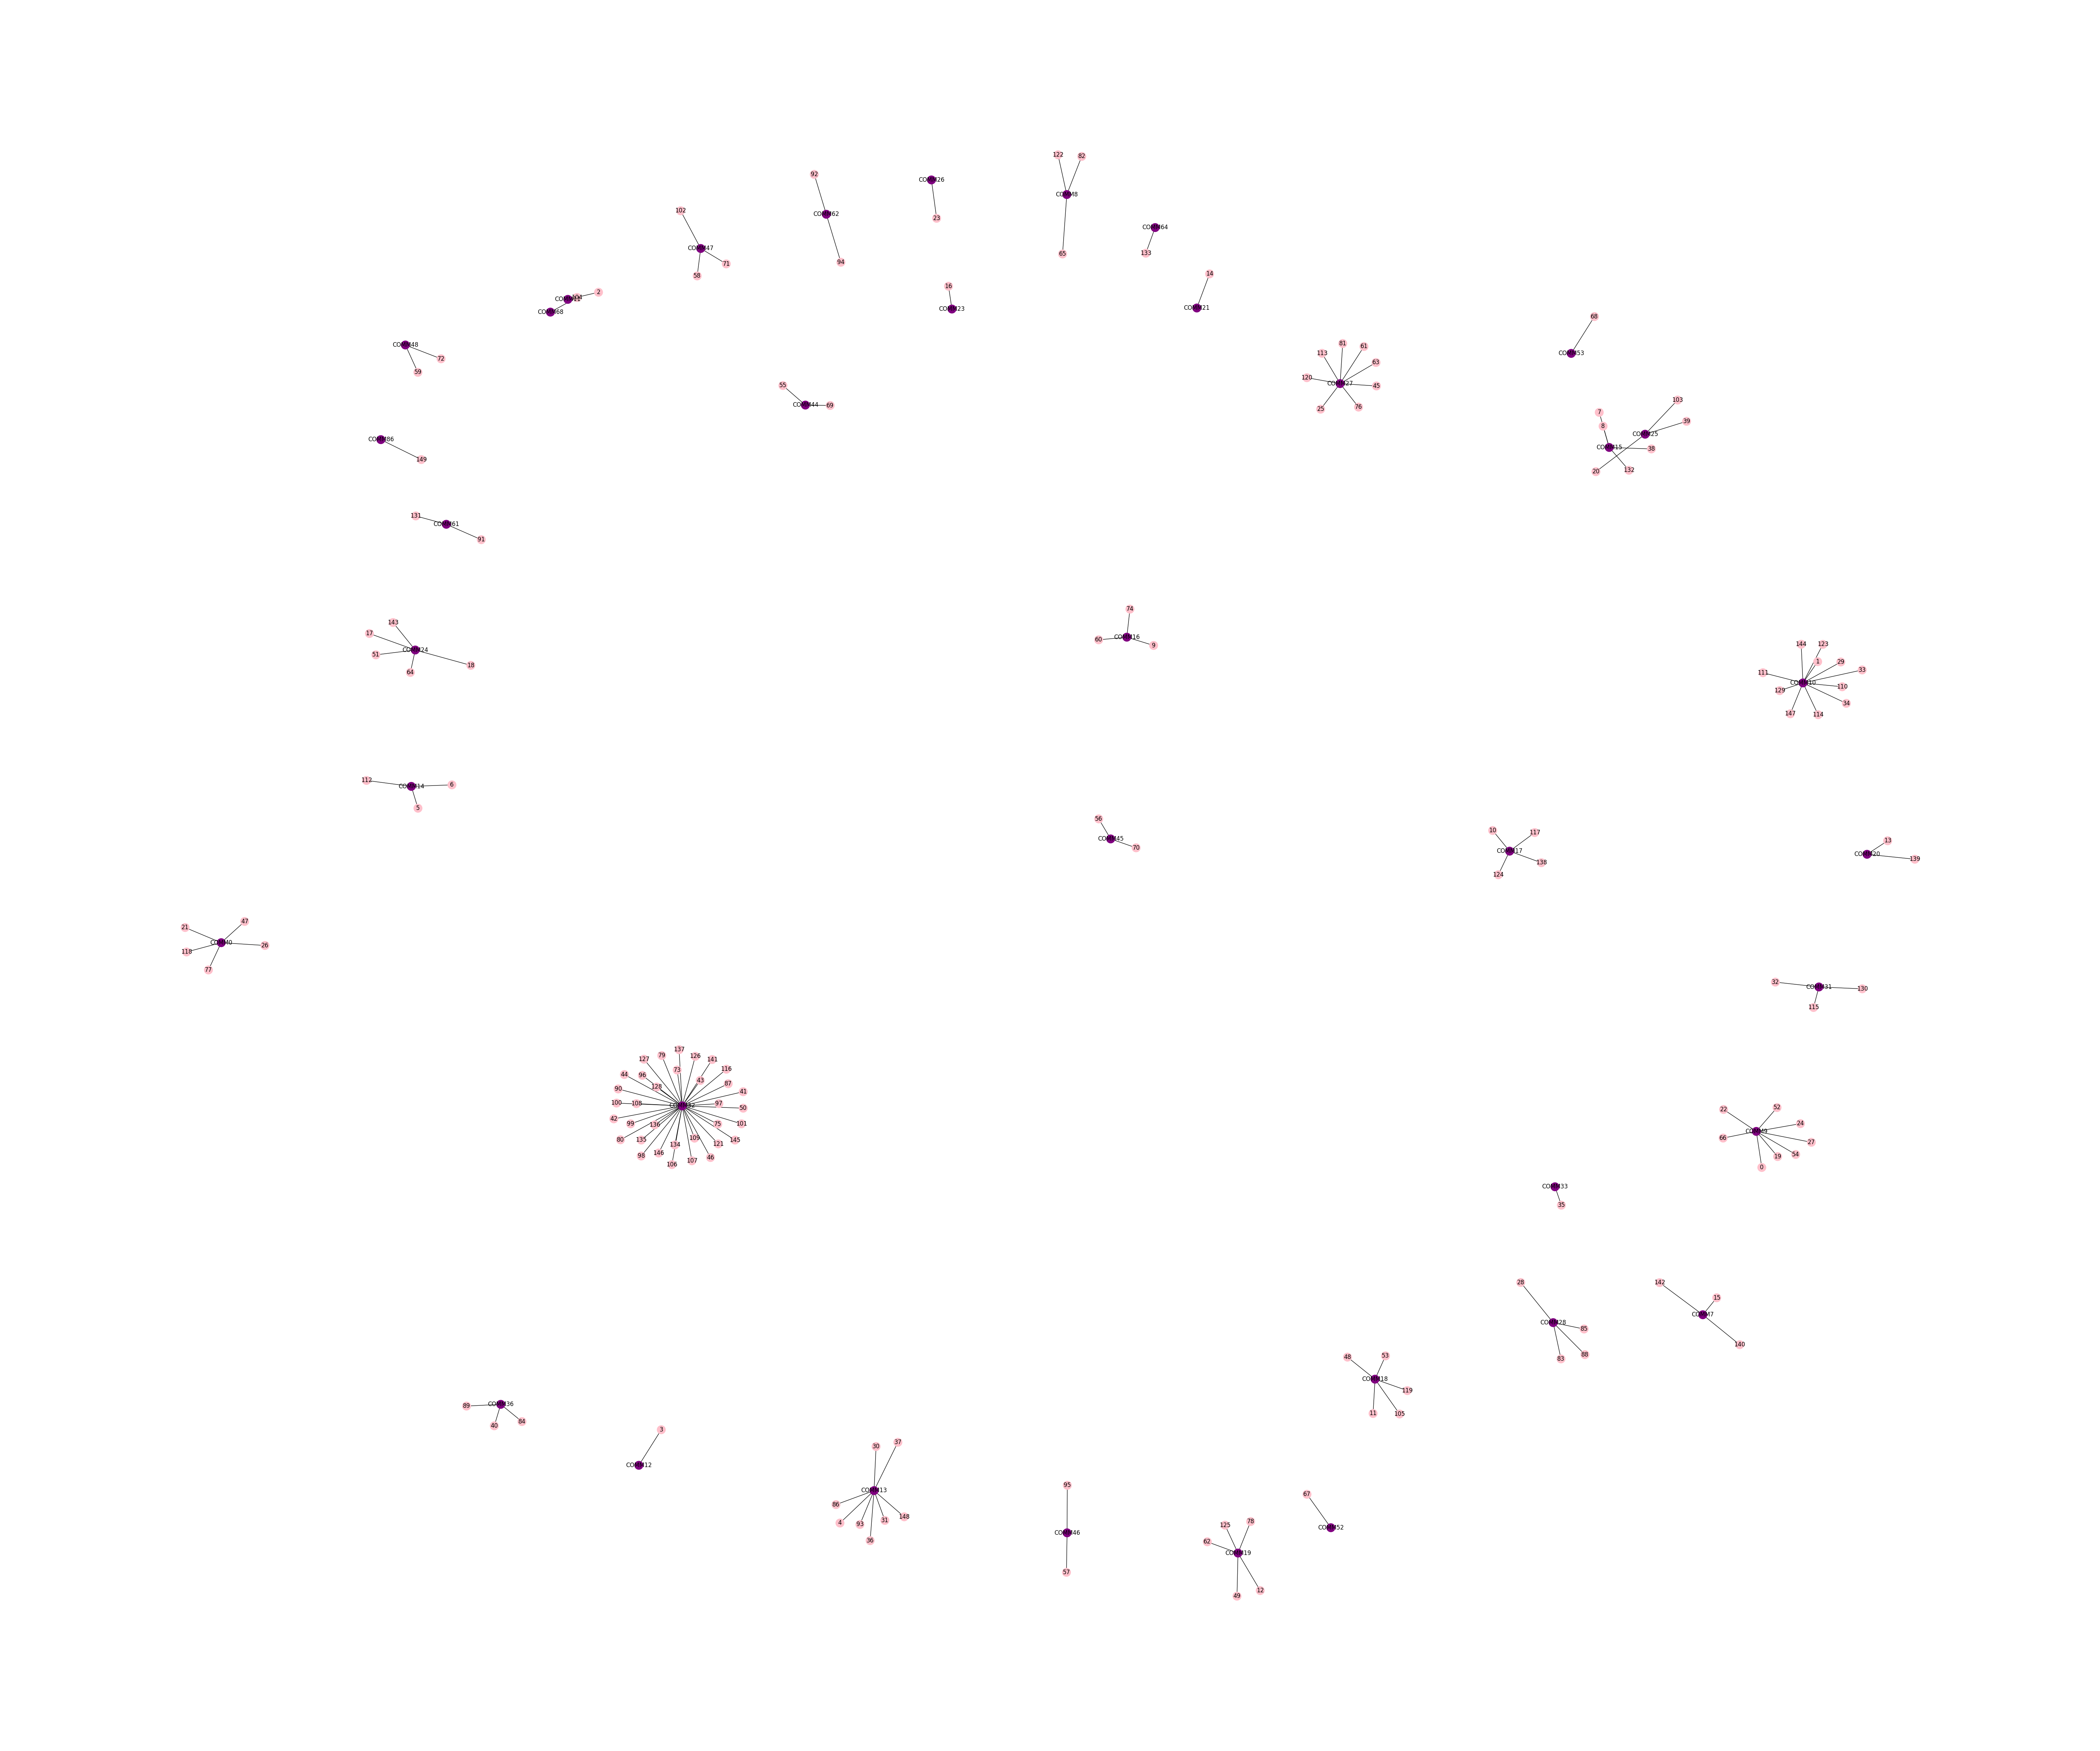

In [25]:
sentence_id = []
comm_stream_id = []
comm_stream = []
sen_id = []
concated = []
for index, row in db3.iterrows():
    sentence_id.append([row['ID'], row['email_id']])
for index, row in db2.iterrows():
    comm_stream_id.append([row['comm_stream_id'], row['email_id']])
for i in sentence_id:
    for j in comm_stream_id:
        if i[1] == j[1] and [i[0], j[0]] not in concated:
            comm_stream.append(j[0])
            sen_id.append(i[0])
            

df = pd.DataFrame(list(zip(comm_stream, sen_id)),
               columns =['comm_stream', 'sen_id'])

plt.figure(figsize=(60,50))
NG5 = nx.from_pandas_edgelist(df.head(150), 'comm_stream', 'sen_id')
color = []
for node in NG5:
    if node in df['sen_id']:
        color.append("pink")
    else: color.append('purple')
nx.draw(NG5, with_labels = True, node_color=color)
##############################################
#ommunication streams and the sentences contained in them
##############################################